In [1]:
from fastai.vision import *
import torch
torch.cuda.set_device(0)
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [10]:
path = untar_data(URLs.CIFAR)

In [11]:
# For CIFAR datasets
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, train = 'train', valid = 'test', bs = 64, size = 32, ds_tfms = tfms).normalize(cifar_stats)

# For Imagenet and its subsets
# tfms = get_transforms(do_flip=False)
# data = ImageDataBunch.from_folder(path, train = 'train', valid = 'val', bs = 64, size = 224, ds_tfms = tfms).normalize(imagenet_stats)

In [ ]:
data.show_batch()

In [13]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy, pretrained = True)
learn.unfreeze()
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 16, 16]         9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 16, 16]         128        True      
______________________________________________________________________
ReLU                 [64, 16, 16]         0          False     
______________________________________________________________________
MaxPool2d            [64, 8, 8]           0          False     
______________________________________________________________________
Conv2d               [64, 8, 8]           36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 8, 8]           128        True      
______________________________________________________________________
ReLU                 [64, 8, 8]           0          False     
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


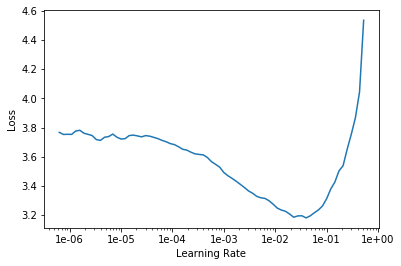

In [14]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(50, max_lr = 1e-4, callbacks=[callbacks.SaveModelCallback(learn, monitor = 'accuracy', mode = 'max')])

epoch,train_loss,valid_loss,accuracy,time
0,0.013176,0.618647,0.873200,00:24
1,0.019301,0.608411,0.874500,00:24
2,0.014788,0.622957,0.870900,00:25
3,0.017873,0.640418,0.869100,00:24
4,0.024040,0.638744,0.869400,00:26
5,0.030291,0.641987,0.868900,00:25
6,0.039610,0.659848,0.862400,00:24
7,0.050679,0.603996,0.863400,00:26
8,0.053857,0.633895,0.859200,00:24


Better model found at epoch 0 with accuracy value: 0.873199999332428.
Better model found at epoch 1 with accuracy value: 0.8744999766349792.


KeyboardInterrupt: 

In [16]:
learn.save('resnet34_cifar10_bs64')

In [18]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy, pretrained = True)
learn.load('resnet34_cifar10_bs64')
preds, y, losses = learn.get_preds(with_loss=True, ds_type = DatasetType.Valid)
interp = ClassificationInterpretation(learn, preds, y, losses)
conf_mat = interp.confusion_matrix()
acc = np.trace(conf_mat) / np.sum(conf_mat, axis = None)
print(acc * 100)

87.51
